<a href="https://colab.research.google.com/github/Bhati0078/ML-Demo/blob/main/TEST_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarPrice_project.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [115]:
dataset = data[['fuelsystem','price']]
dataset.head()

,fuelsystem,price
0,mpfi,13495.0
1,mpfi,16500.0
2,mpfi,16500.0
3,mpfi,13950.0
4,mpfi,17450.0


In [116]:
# Label encoding for the 'fuelsystem' column
le = LabelEncoder()
dataset['fuelsystem_encoded'] = le.fit_transform(dataset['fuelsystem'])

<ipython-input-116-3f73d1280d79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['fuelsystem_encoded'] = le.fit_transform(dataset['fuelsystem'])


In [117]:
dataset.head()

,fuelsystem,price,fuelsystem_encoded
0,mpfi,13495.0,5
1,mpfi,16500.0,5
2,mpfi,16500.0,5
3,mpfi,13950.0,5
4,mpfi,17450.0,5


In [118]:
print(dataset['fuelsystem'].unique())
print(dataset['fuelsystem_encoded'].unique())


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
[5 1 4 0 7 2 3 6]


In [119]:
# Use MinMaxScaler to scale the features
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)


In [120]:
# Separate features (X) and target variable (y)
X = dataset[['fuelsystem_encoded']]
y = dataset['price']

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [122]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [123]:
X_train[0:5]

array([[0.71428571],
       [0.42857143],
       [0.71428571],
       [0.71428571],
       [0.14285714]])

In [124]:
X_test[0:5]

array([[0.14285714],
       [0.14285714],
       [0.14285714],
       [0.14285714],
       [0.        ]])

In [125]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [126]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [127]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 41076093.65834413


In [128]:
# y_pred     Mean Squared Error: 56466431.74965411

In [129]:
# y_test

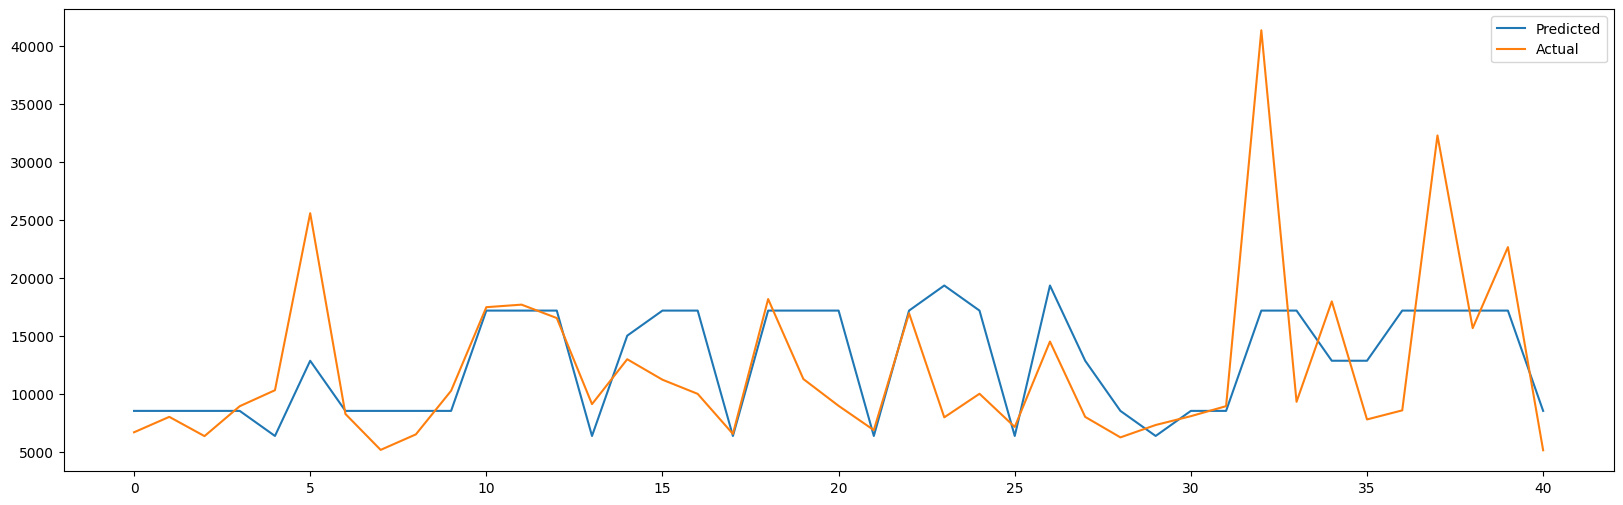

In [130]:
# Plotting graph between predicted and actual
plt.figure(figsize=(20,6))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [131]:
from sklearn.metrics import r2_score
import numpy as np
r2_score(y_test,y_pred)

0.2524895460809218

In [132]:
y_train_pred = model.predict(X_train)
r2_score(y_train,y_train_pred)

0.27780369546632644

In [133]:


# Assuming y_test and y_pred are your actual and predicted values
r2 = r2_score(y_test, y_pred)

# Calculate the number of features (p) for adjusted R-squared
p = X_test.shape[1]

# Calculate adjusted R-squared
n = len(y_test)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')


R-squared: 0.2524895460809218
Adjusted R-squared: 0.23332261136504795


In [134]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.2524895460809218


In [135]:
#                                 ****** One Hot Encoding ************

In [136]:
df_encoded = pd.get_dummies(dataset, columns=['fuelsystem'], prefix=['fuelsystem'])
df_encoded.head()

,price,fuelsystem_encoded,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,5,0,0,0,0,0,1,0,0
1,16500.0,5,0,0,0,0,0,1,0,0
2,16500.0,5,0,0,0,0,0,1,0,0
3,13950.0,5,0,0,0,0,0,1,0,0
4,17450.0,5,0,0,0,0,0,1,0,0


In [137]:
# Split the data into features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [138]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=42)


In [139]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [141]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [142]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 56466431.74965411


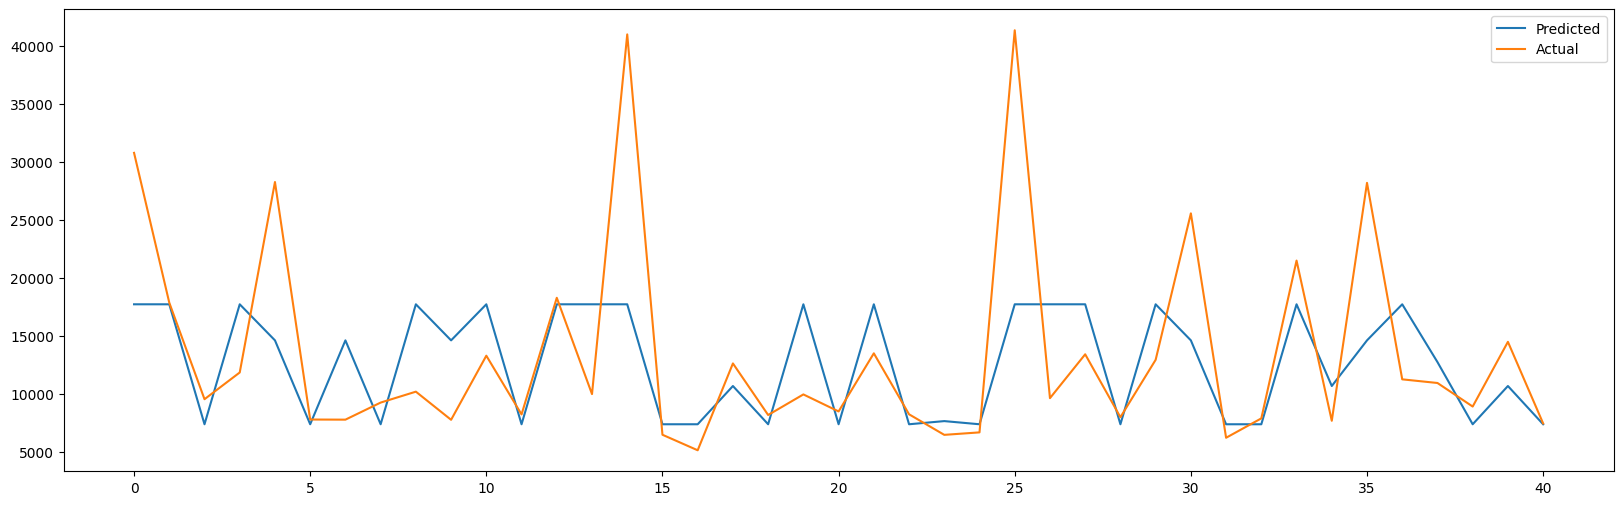

In [143]:
# Plotting graph between predicted and actual
plt.figure(figsize=(20,6))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [144]:
r2_score(y_test,y_pred)

0.28472820207965366

In [145]:
                       # ****************** MODEL *****************

<ipython-input-146-15e255af076a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'],color="y")


<Axes: xlabel='price', ylabel='Density'>

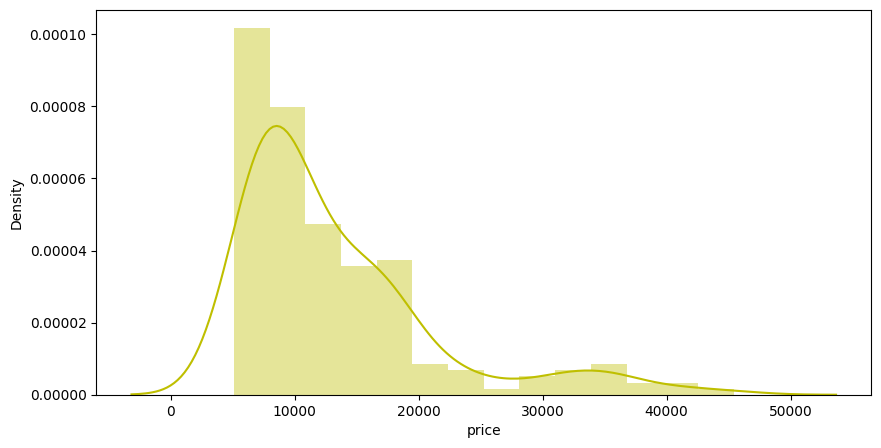

In [146]:
# Dependent variable 'Price'
plt.figure(figsize=(10,5))
sns.distplot(data['price'],color="y")

<ipython-input-147-6a2d7695be08>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(data['price']),color="y")


<Axes: xlabel='price', ylabel='Density'>

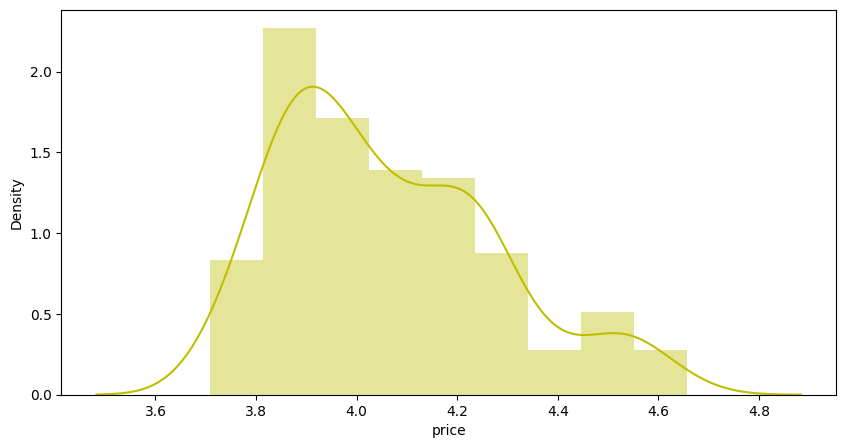

In [147]:
# Dependent variable 'Price'
plt.figure(figsize=(10,5))
sns.distplot(np.log10(data['price']),color="y")

In [148]:
# difine Numerical and Catagorical Features

numeric_features = data.describe().columns
catagorical_features = data.describe(include = 'O').columns

numeric_features

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

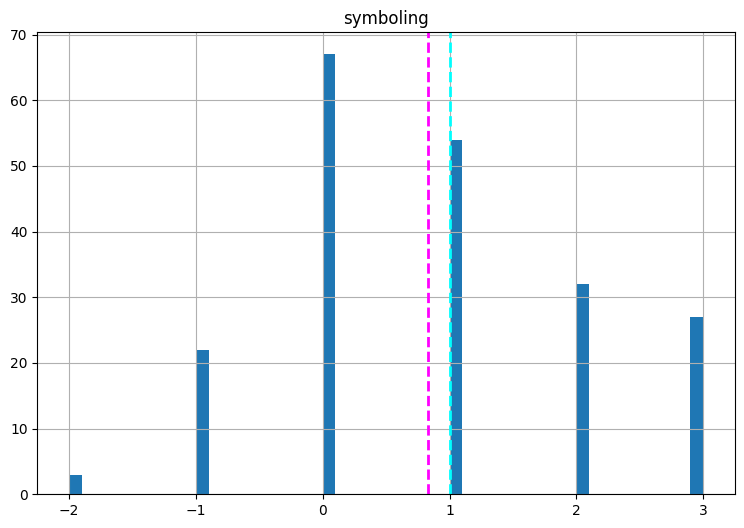

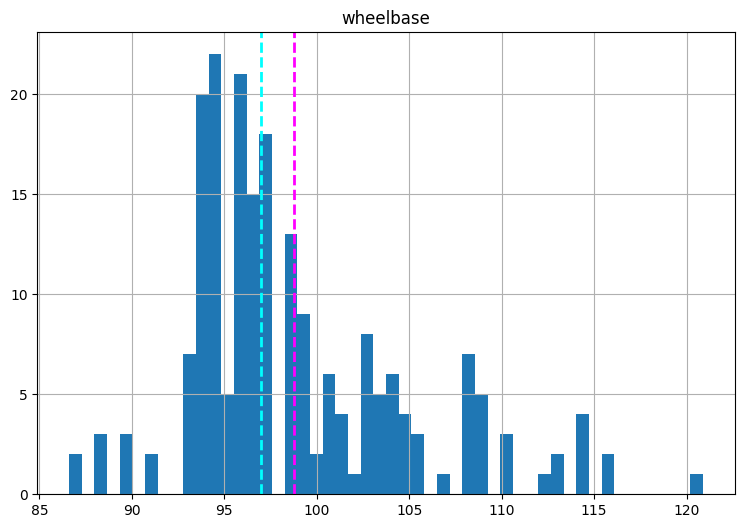

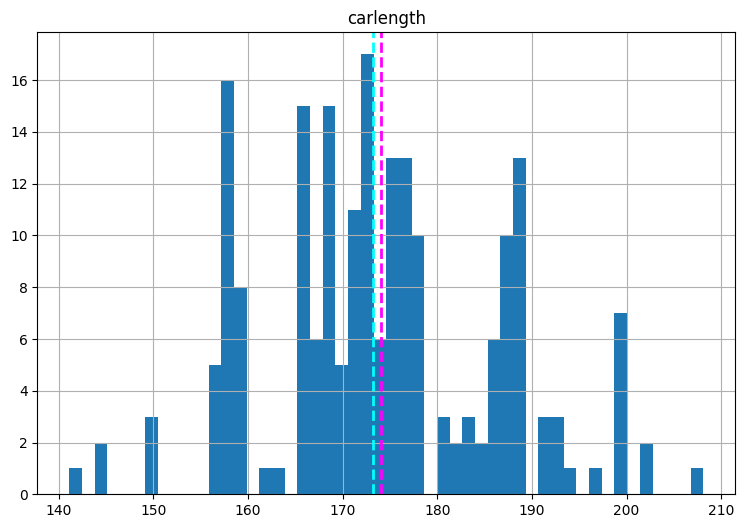

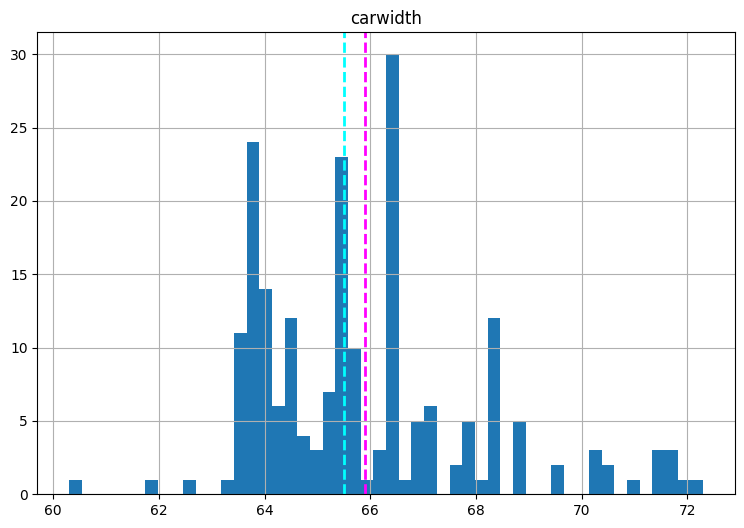

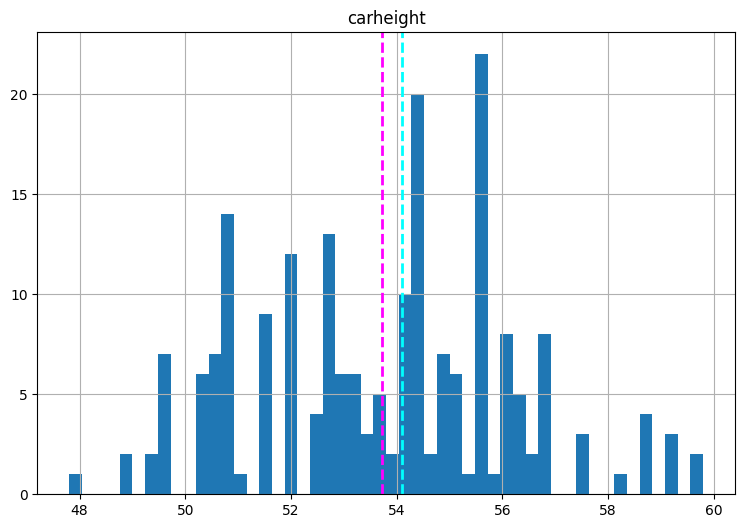

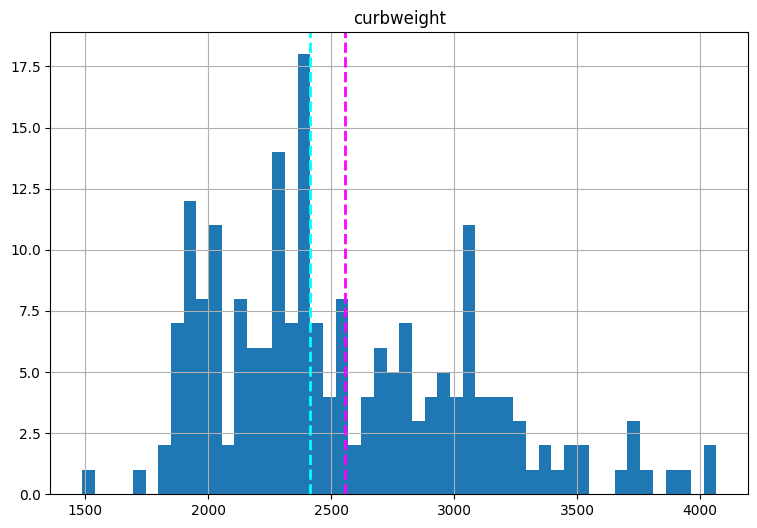

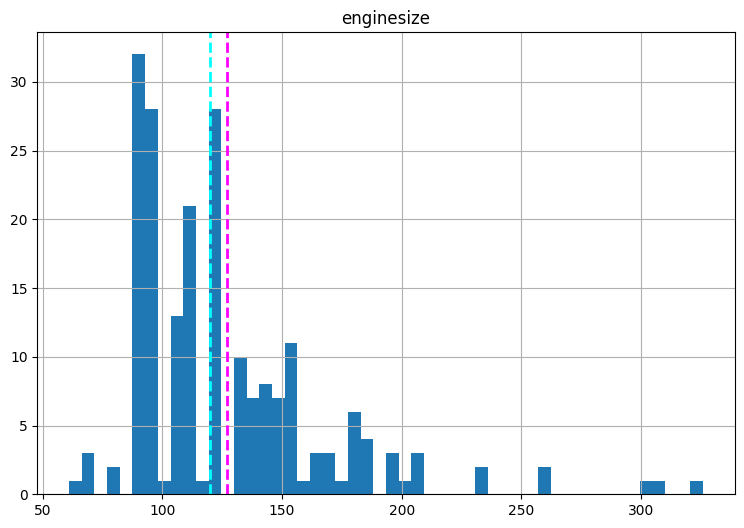

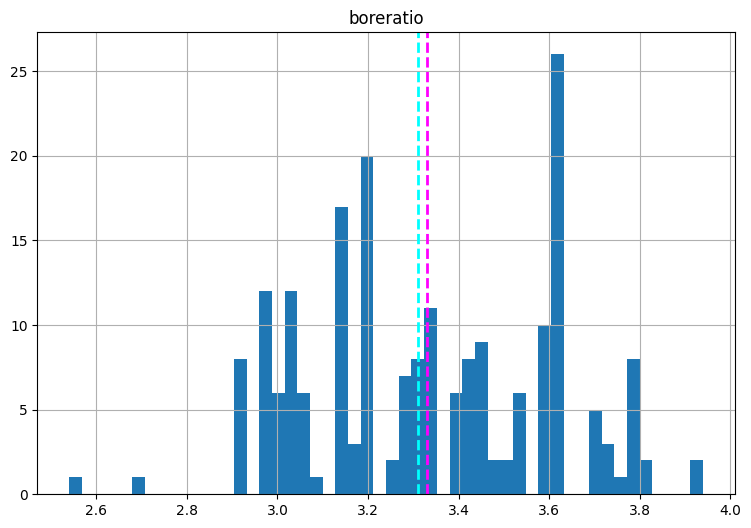

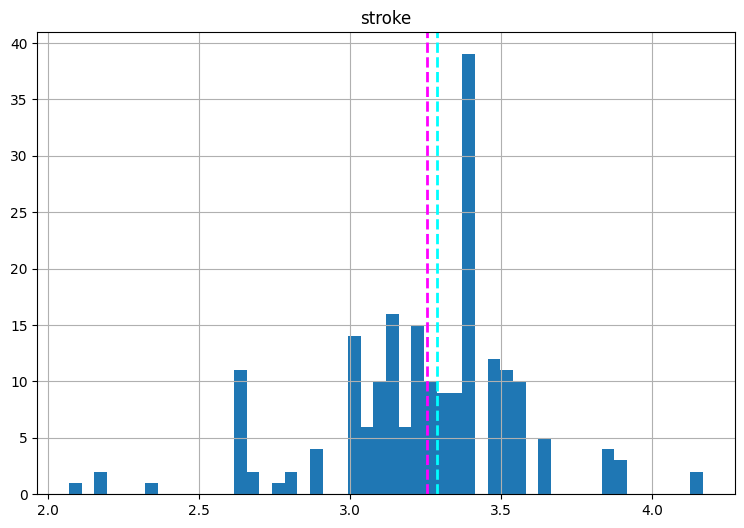

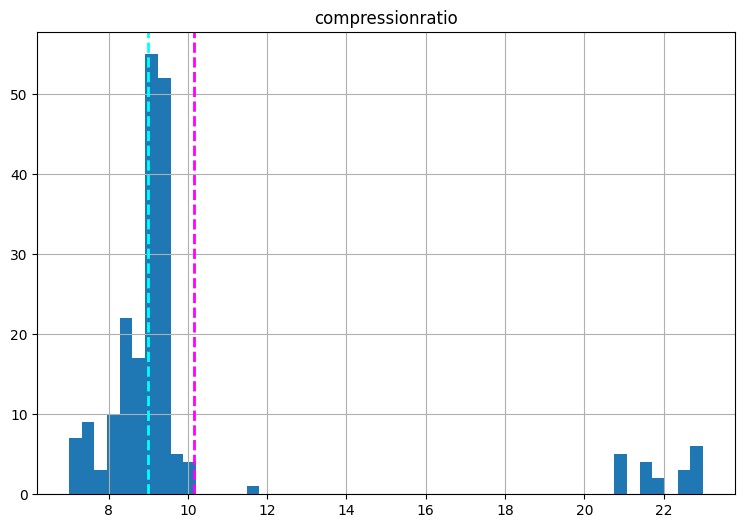

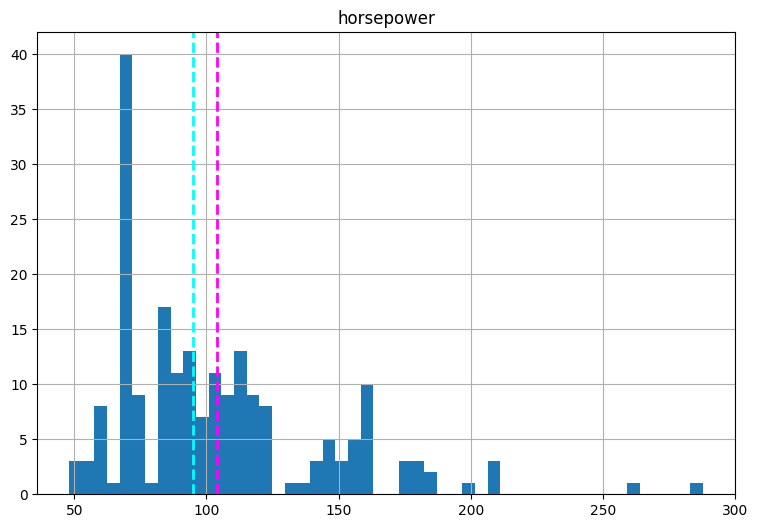

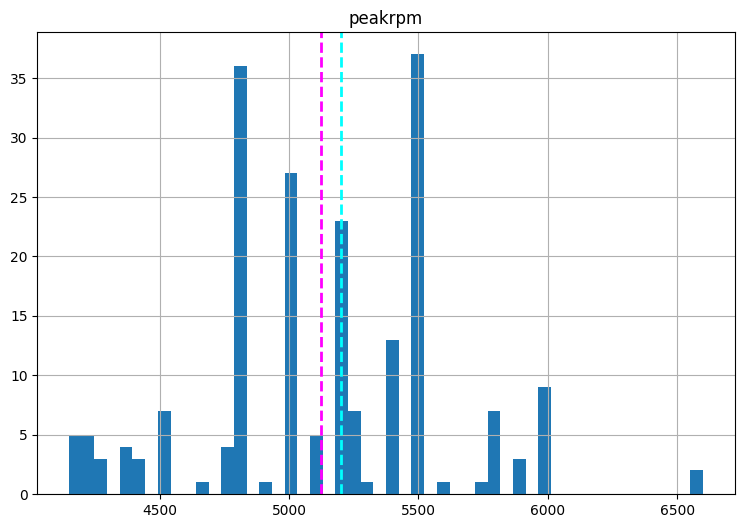

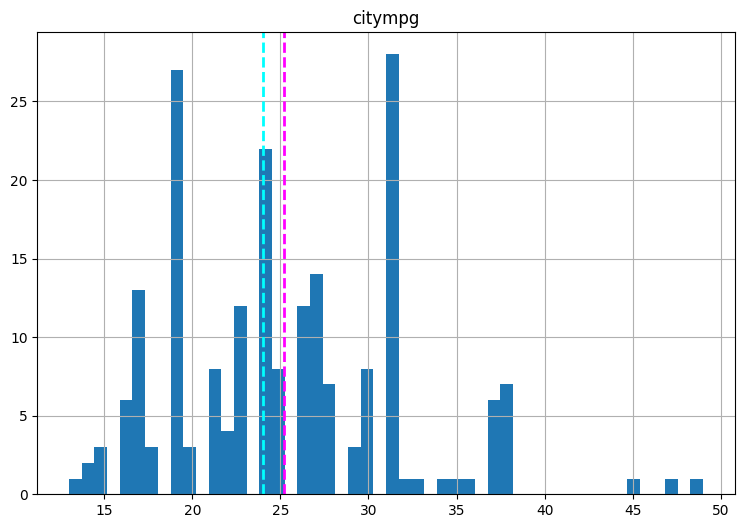

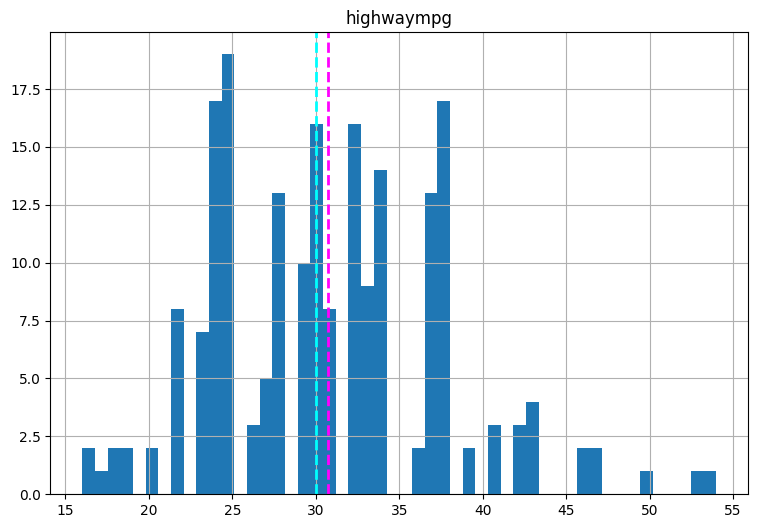

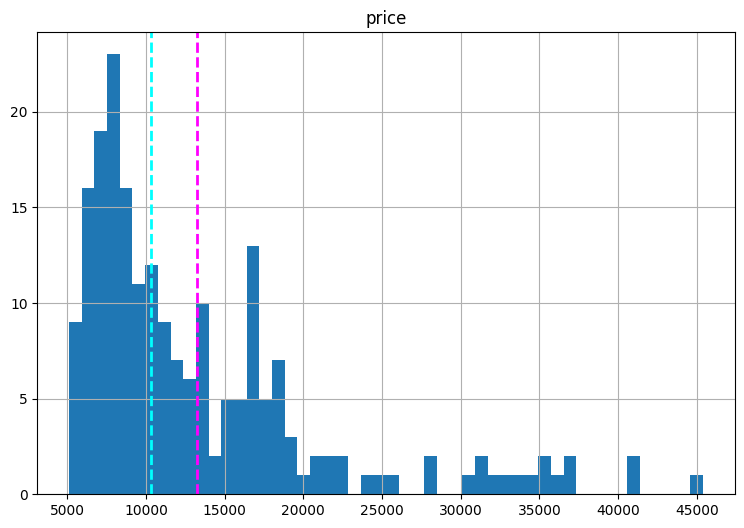

In [150]:
# plot a bar plot for each categorical feature count (except car_ID)

## A histogram is a graph that shows the frequency of numerical data using rectangles

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    # showing current line fig.gca()
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

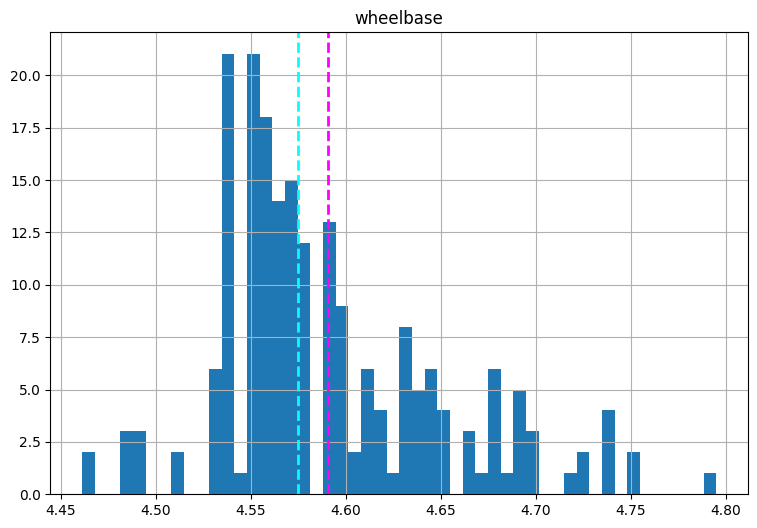

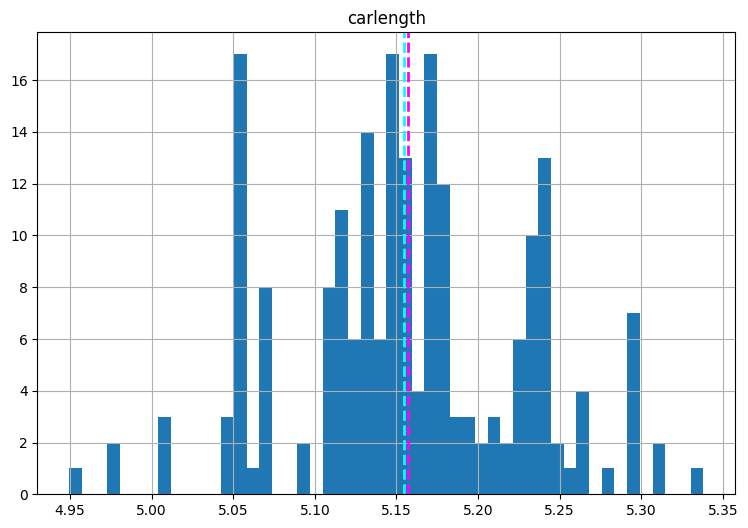

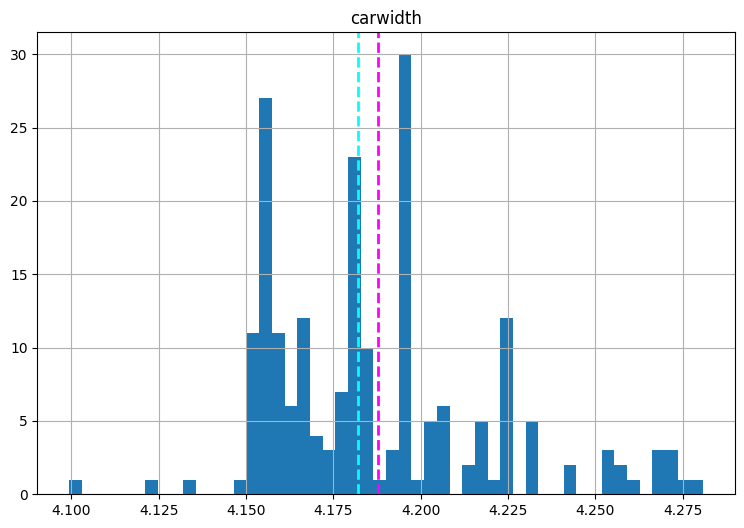

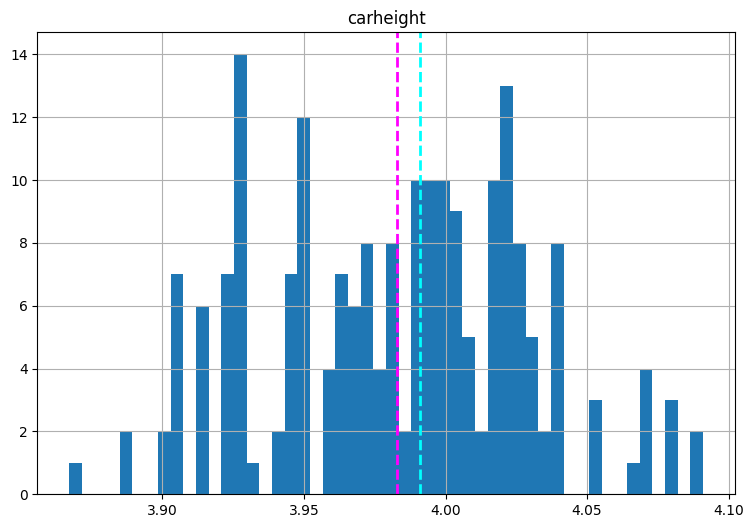

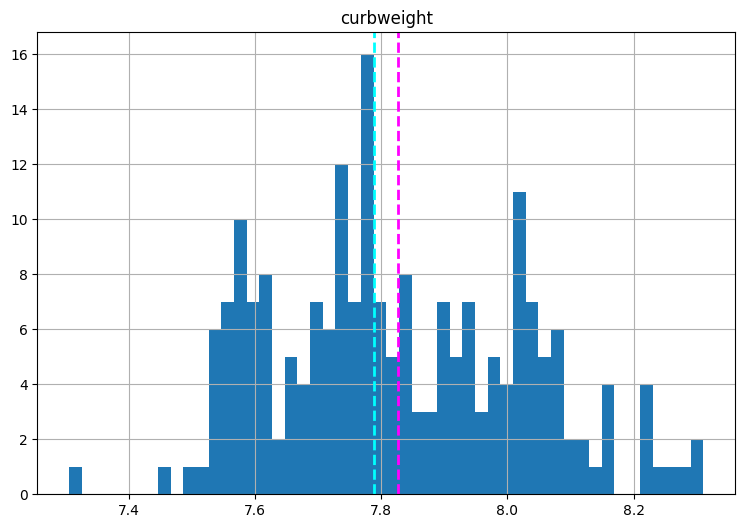

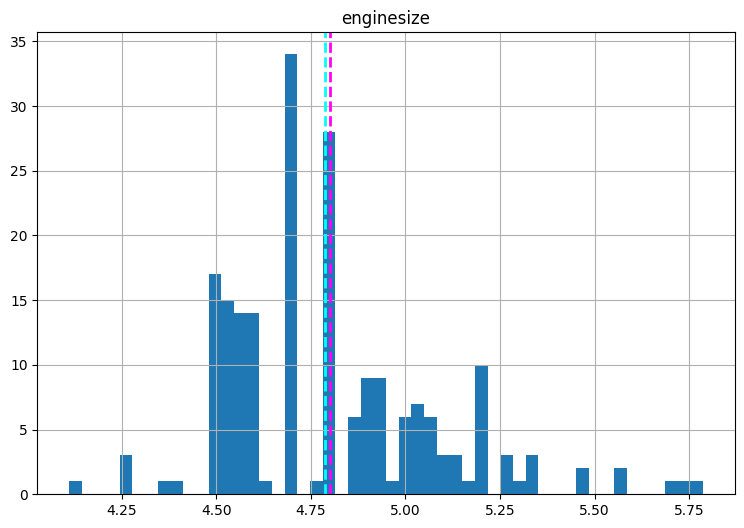

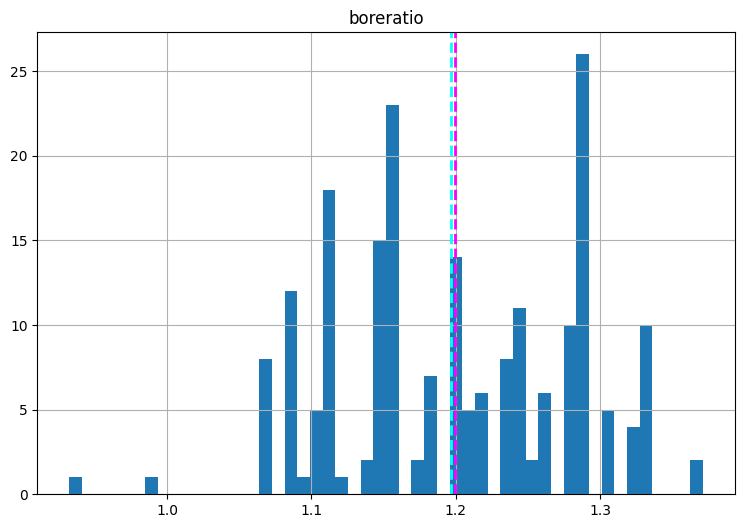

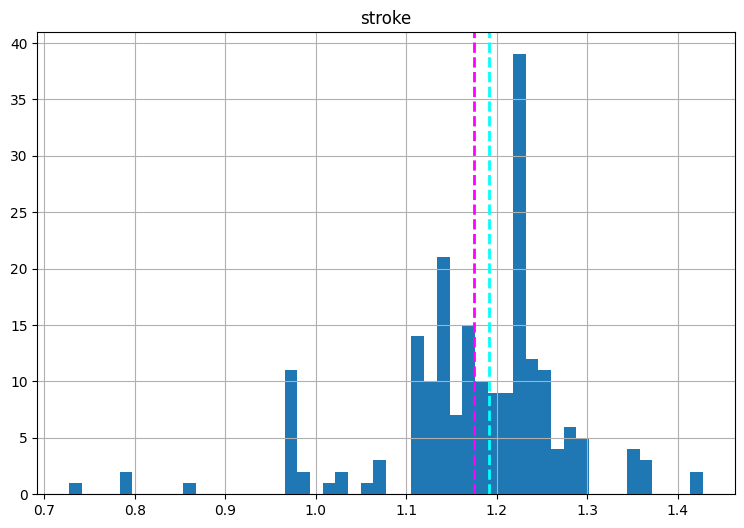

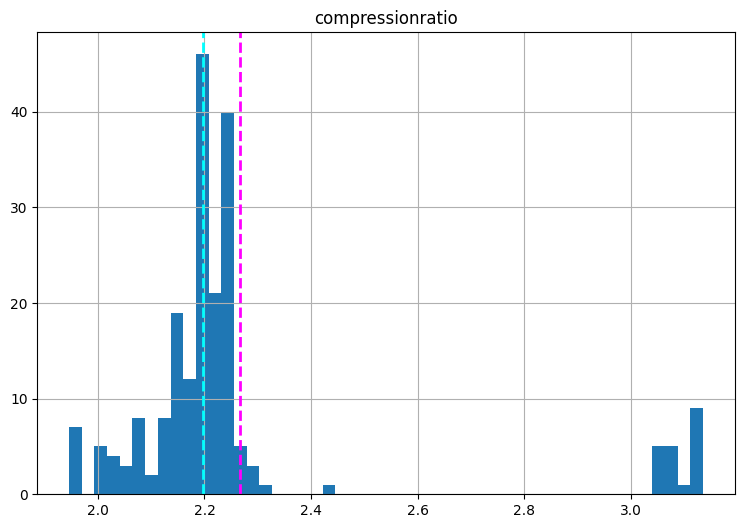

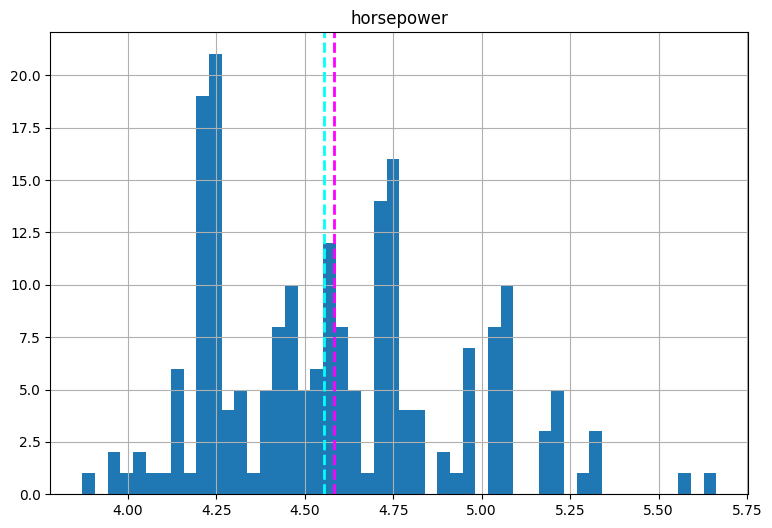

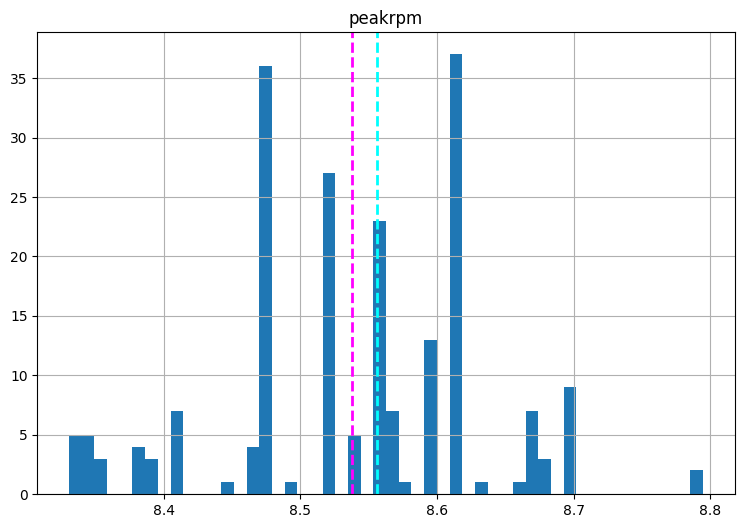

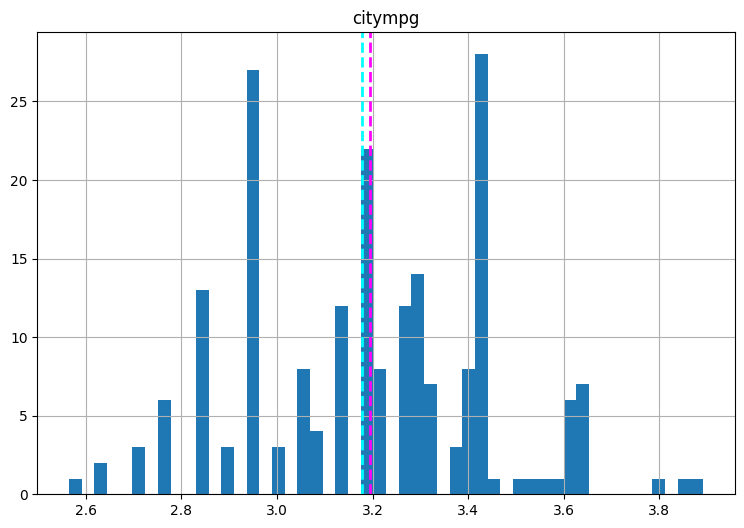

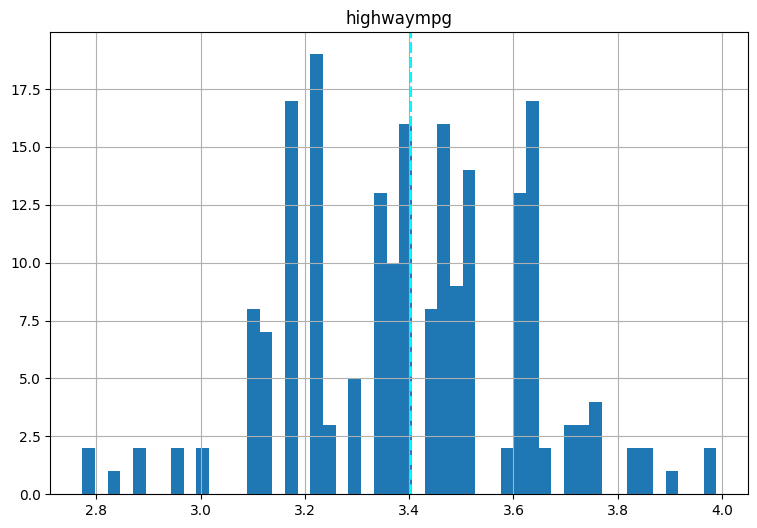

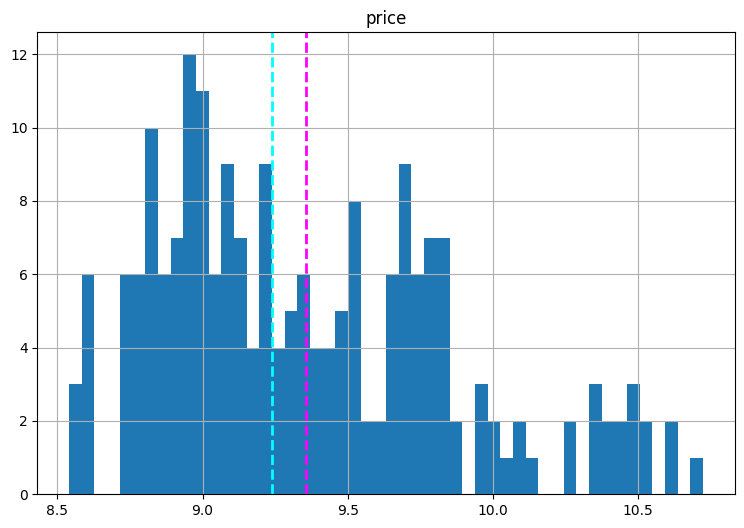

In [151]:
# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(data[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

In [155]:
# correlation

-0.07997822464270347

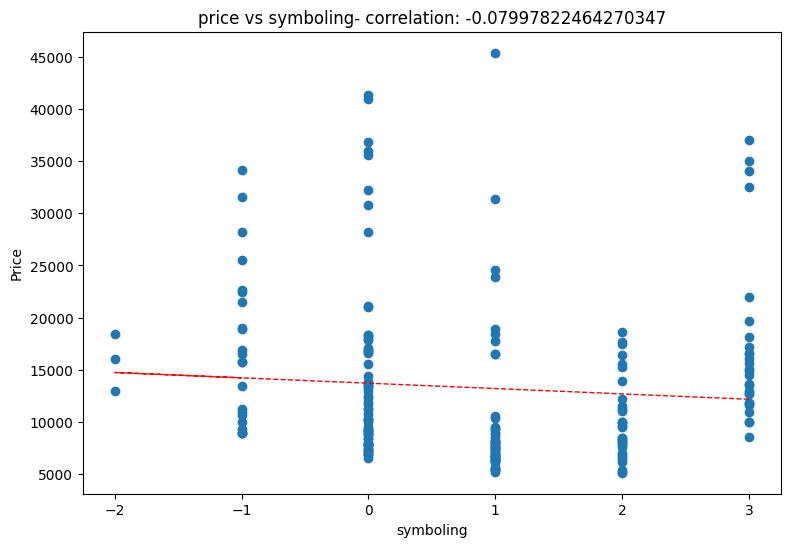

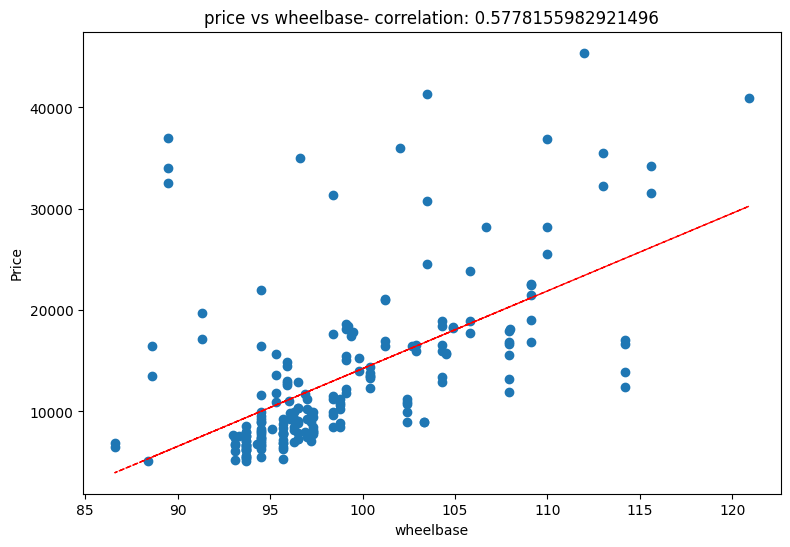

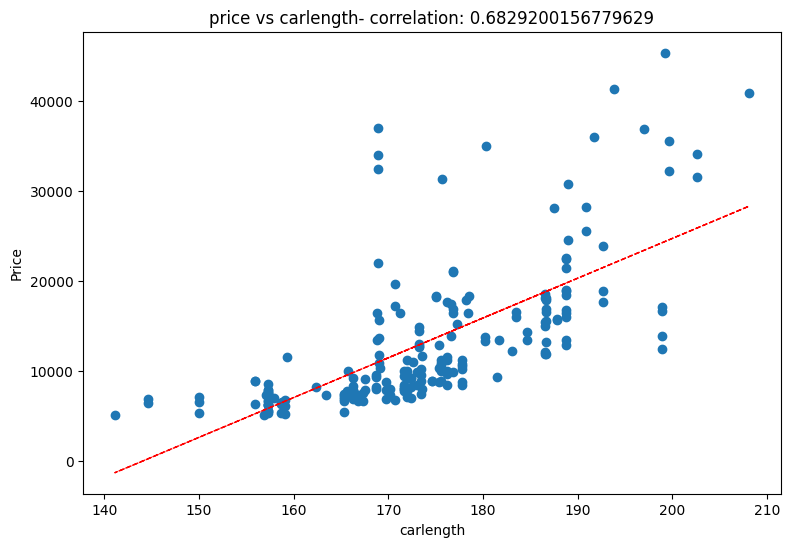

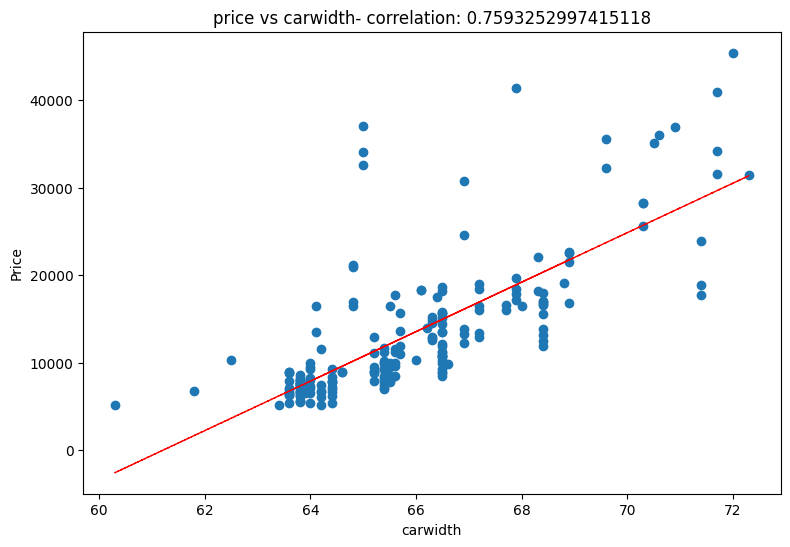

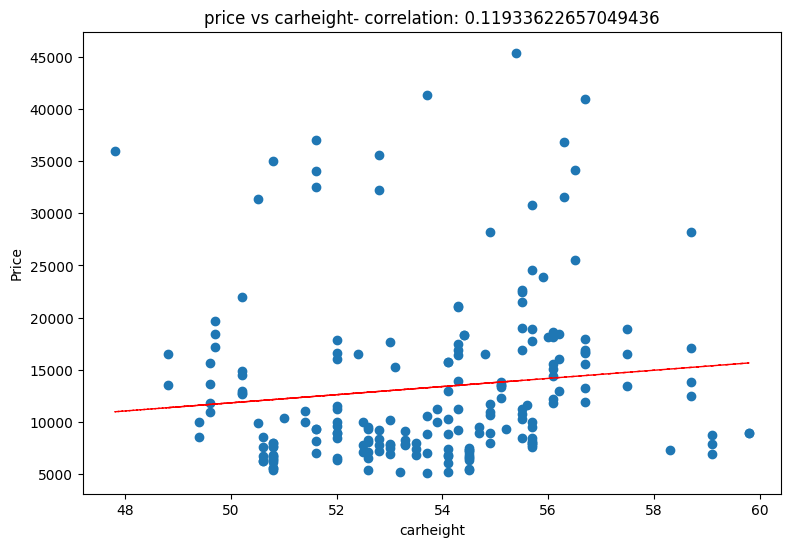

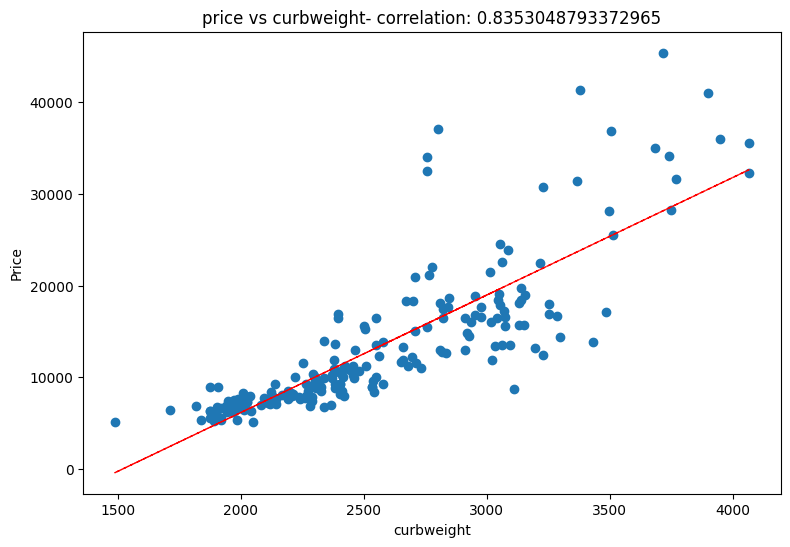

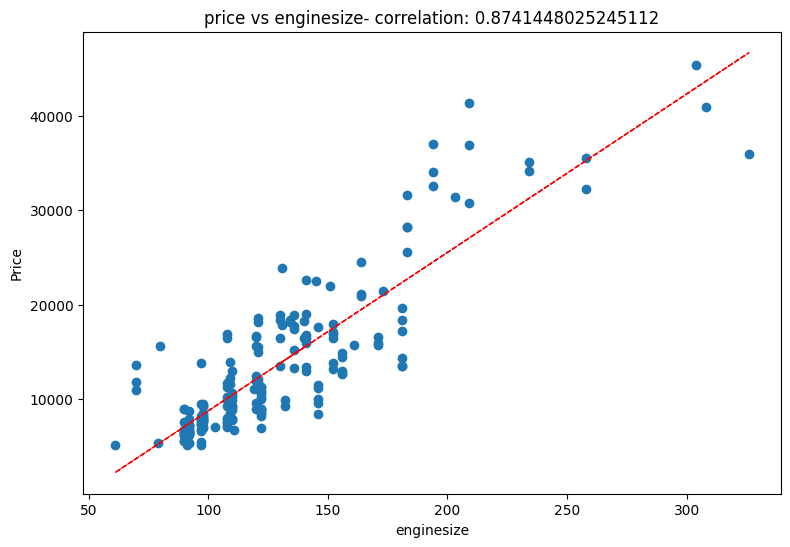

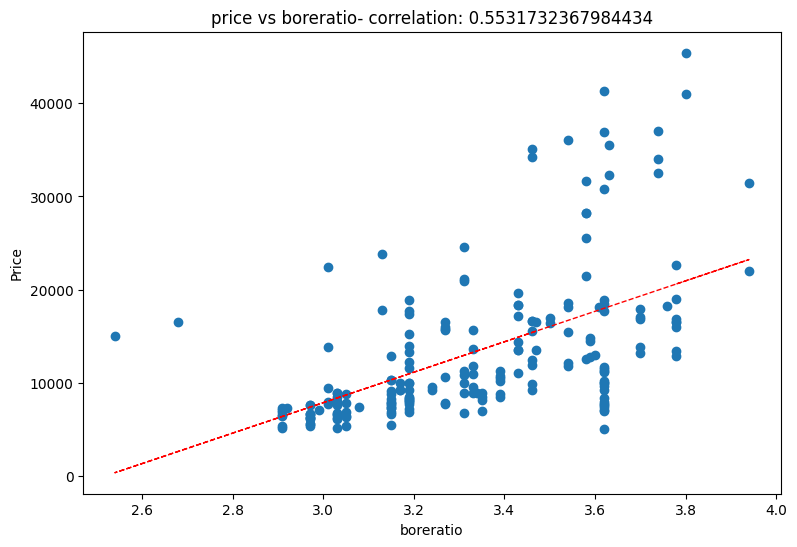

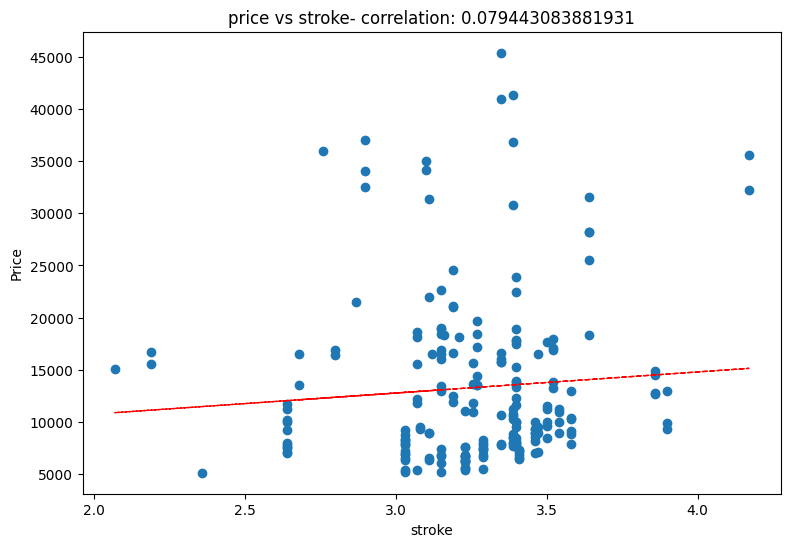

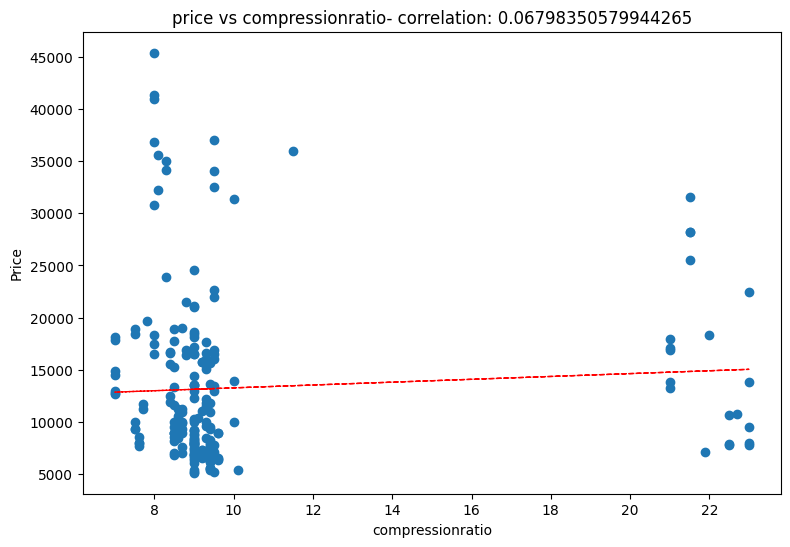

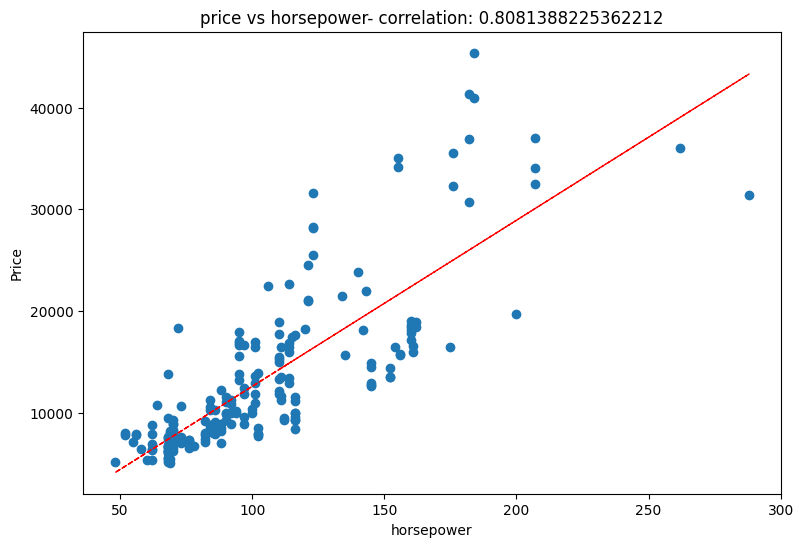

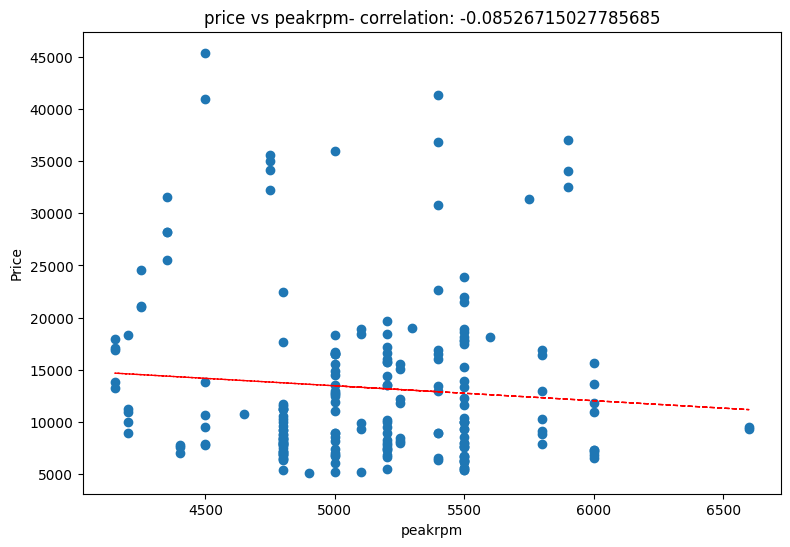

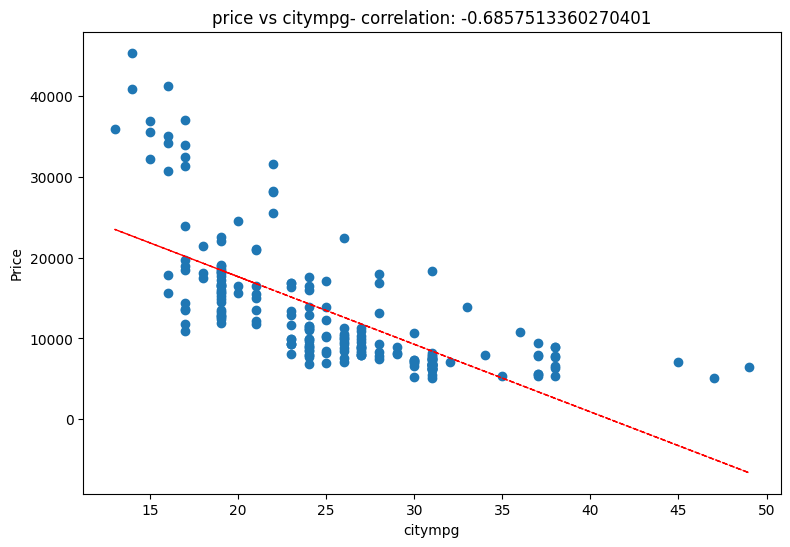

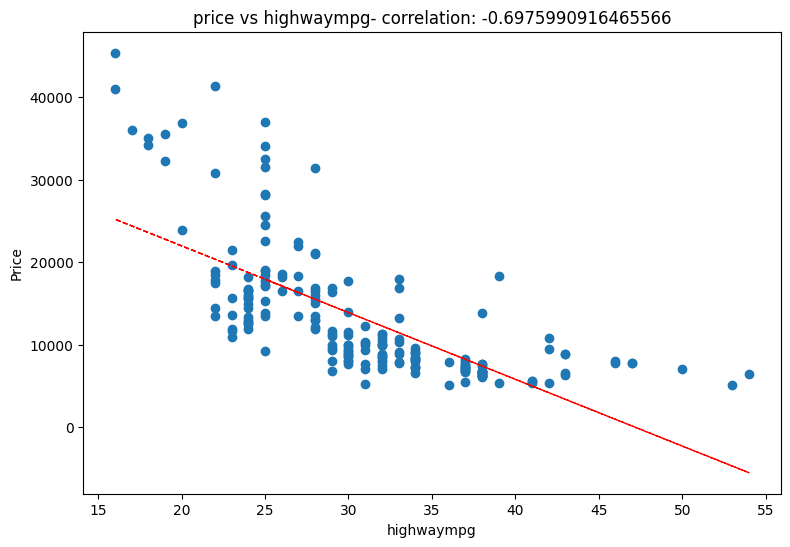

In [156]:
# Relationship Between Indepedent variables vs Dependent Variables

for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['price'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

In [158]:
data.corr()

<ipython-input-158-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<ipython-input-159-74a5f097ac57>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

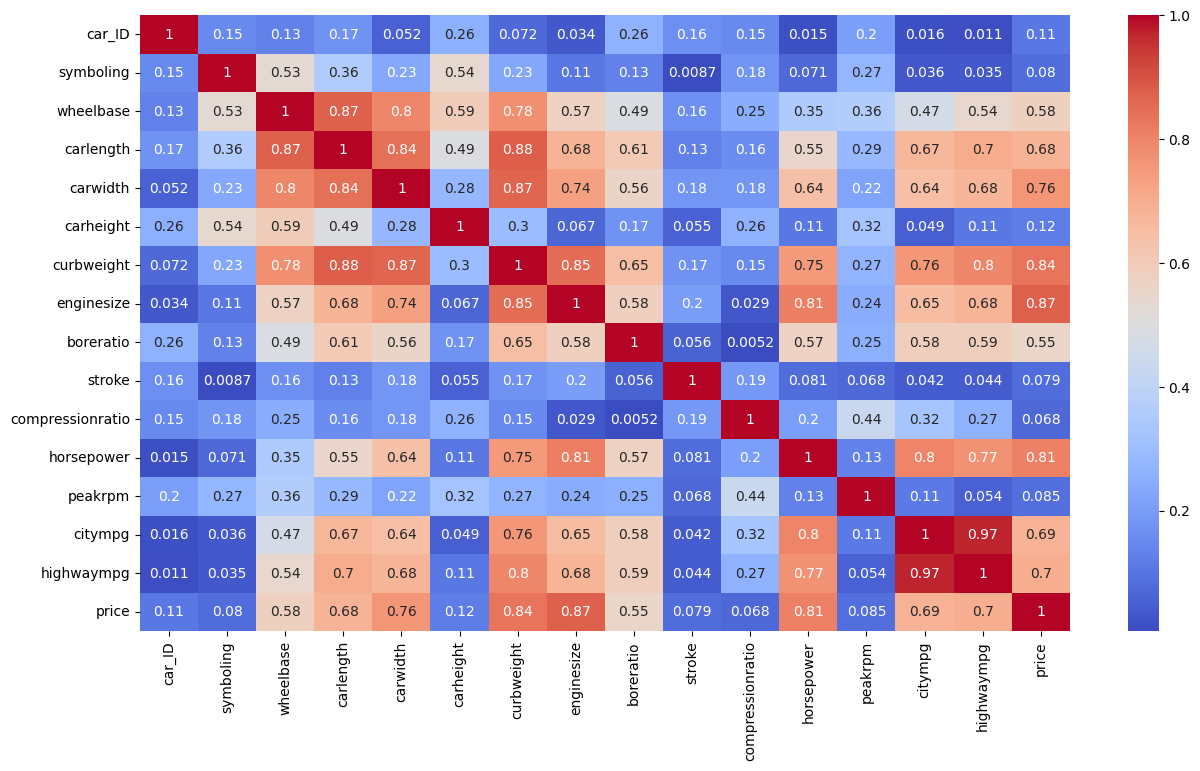

In [159]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [174]:
### removing multicollear
data['mileage'] = 0.6*data['citympg'] + 0.4*data['highwaympg']
data['car_area'] = data['carlength']*data['carwidth']

In [175]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # X.shape[1] mean numbers of rows

    return(vif)


In [176]:
# Numerical Columns List
data.describe().columns.values

array(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'mileage', 'car_area'], dtype=object)

In [177]:
# Claculating VIF for Numerical columns except this ['citympg','highwaympg','carwidth','carlength','price'] columns
calc_vif(data[[i for i in data.describe().columns if i not in ['citympg','highwaympg','carwidth','carlength','price']]])

,variables,VIF
0,car_ID,5.108466
1,symboling,2.068827
2,wheelbase,2002.995547
3,carheight,838.606826
4,curbweight,406.678411
5,enginesize,69.645658
6,boreratio,276.747426
7,stroke,122.139752
8,compressionratio,15.906703
9,horsepower,59.812990


In [178]:
# Claculating VIF for Numerical columns except this ['car_ID','symboling','enginesize','curbweight','boreratio','stroke','peakrpm','citympg','highwaympg','carwidth','carlength','wheelbase','carheight','curbweight','car_area','price'] columns

calc_vif(data[[i for i in data.describe().columns if i not in ['car_ID','symboling','enginesize','curbweight','boreratio','stroke','peakrpm','citympg','highwaympg','carwidth','carlength','wheelbase','carheight','curbweight','car_area','price']]])

,variables,VIF
0,compressionratio,8.300147
1,horsepower,3.809396
2,mileage,8.222253


In [179]:
# Claculating VIF for Numerical columns except this ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight'] columns

calc_vif(data[[i for i in data.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

,variables,VIF
0,enginesize,5.170320
1,compressionratio,9.119143
2,mileage,8.201171


In [181]:
# Numeric Features that is highly Dependent
numerical_features = ['enginesize','compressionratio','mileage']

In [183]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [184]:
data['company'] = data['CarName'].str.split(" ", expand=True)[0]
data['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [186]:
# Categorical  Columns
data.describe(include = ['O']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [188]:
data.company.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64